#Iteracion 3, apredizaje supervisado
#GitHub: https://github.com/damesaa201710054010/deep_clustering_and_digital_contents_prediction.git
Implementacion de tecnicas de ML sobre un dataset

- Federico Jaramillo
- Daniel Mesa
- 17 10 2020

#Objetivo

Para esta iteracion, la meta es la implementacion de metodos de aprendizaje no supervisado, acudiendo a las difetentes tecnicas de clustering por ejemplo, ademas de entender y evaluar los resultados obtenidos


#Caractetizacion y diseño en el producto

## Ciencia de los Datos e ingenieria de descriptres y caracteristicas


Importamos las librerias necesarias para el pre procesamiento de datos y lectura de los mismos asi como para la implementacion del modelo

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


Carga de datos


In [4]:
from google.colab import files
files.upload()

Saving Cust_Segmentation.csv to Cust_Segmentation (1).csv


{'Cust_Segmentation.csv': b'Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio\r\n1,41,2,6,19,0.124,1.073,0,NBA001,6.3\r\n2,47,1,26,100,4.582,8.218,0,NBA021,12.8\r\n3,33,2,10,57,6.111,5.802,1,NBA013,20.9\r\n4,29,2,4,19,0.681,0.516,0,NBA009,6.3\r\n5,47,1,31,253,9.308,8.908,0,NBA008,7.2\r\n6,40,1,23,81,0.998,7.831,,NBA016,10.9\r\n7,38,2,4,56,0.442,0.454,0,NBA013,1.6\r\n8,42,3,0,64,0.279,3.945,0,NBA009,6.6\r\n9,26,1,5,18,0.575,2.215,,NBA006,15.5\r\n10,47,3,23,115,0.653,3.947,0,NBA011,4\r\n11,44,3,8,88,0.285,5.083,1,NBA010,6.1\r\n12,34,2,9,40,0.374,0.266,,NBA003,1.6\r\n13,24,1,7,18,0.526,0.643,0,NBA000,6.5\r\n14,46,1,6,30,1.415,3.865,,NBA019,17.6\r\n15,28,3,2,20,0.233,1.647,1,NBA000,9.4\r\n16,24,1,1,16,0.185,1.287,,NBA005,9.2\r\n17,29,1,1,17,0.132,0.293,0,NBA004,2.5\r\n18,43,4,1,26,1.519,1.237,0,NBA005,10.6\r\n19,44,1,18,61,2.806,3.782,,NBA000,10.8\r\n20,36,1,16,32,0.544,2.944,,NBA013,10.9\r\n21,29,2,6,25,0.585,0.465,0,NBA009,4.2\r\n22,36,3,10,

Leemos los datos, para este caso, utiliaremos un dataset que contiene los datos de los clientes de una compañia y queremos mediante metodos de clustering realizar una segmentacion de los mismos, lo cual a una compañia ayura a enfocar sus recursos por ejemplo en las personas mas potenciales a comprar sus productos o suscribirse en sus servicios

In [8]:
import pandas as pd
cust_df = pd.read_csv("Cust_Segmentation.csv")
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2



Como podemos ver, la variable Address es una variable categorica, el algoritmo que aplicaremos inicialmente, no tiene en cuenta estas variables por el calculo de la distancia

In [9]:
df = cust_df.drop('Address', axis=1)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


Ahora normalicemos el conjunto de datos. La normalización es un método estadístico que ayuda a interpretar características con diferentes magnitudes y distribuciones por igual. Usamos __tandardScaler () __ para normalizar nuestro conjunto de datos.

In [10]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,1:]
X = np.nan_to_num(X) #valores nulos
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

#Diseño en el producto

Para decidir el número de clusters (k) utilizamos una gráfica de codo, se hace una iteración variando el valor de k y calculando su error cuadrático, al graficarlo buscamos el 'codo' para determinar el valor óptimo de k (en este caso 5).

[-6800.0, -5194.592921992777, -4339.0172944029855, -3763.723990968006, -3411.06427730624, -3103.1484280579116, -2895.290075699402, -2698.263875433565, -2541.8575754545163, -2451.428867858731, -2345.9301536271555, -2226.458277991817, -2132.420174197616, -2091.3177038757817, -2013.9211962880186, -1953.7756605600637, -1898.1686285419455, -1833.5249562040149, -1793.9316528079999, -1729.515279744515, -1722.986342339937, -1646.7046291041295, -1595.1243383779865, -1585.085052163438, -1544.2686454607915, -1501.4971094089433, -1464.124444753741, -1445.1001530784906, -1418.0410185134388]


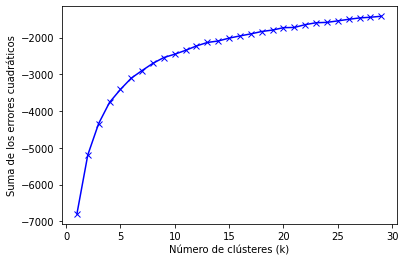

In [11]:
n_clusters = range(1, 30)
kmeans = [KMeans(init = "k-means++", n_clusters = i, n_init = 12) for i in n_clusters]
score = [kmeans[i].fit(Clus_dataSet).score(Clus_dataSet) for i in range(len(kmeans))]
print(score)
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(n_clusters,score,'bx-')

#Prototipo y pruebas

Aplicamos el algoritmo de k-means para hayar la mejor agrupacion, en este caso usamos un metodo modificado "k-means++" que ayuda a converger mas rapido

In [12]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12) #definicion del metodo k-means
k_means.fit(Clus_dataSet) #aplicamos el metodo
labels = k_means.labels_ #extraemos las etiquetas
print(labels)

[0 1 4 0 3 1 0 2 0 1 4 0 0 1 4 0 0 2 1 1 0 2 4 1 3 1 0 1 0 0 1 1 4 2 0 0 4
 4 0 1 4 1 0 2 0 1 0 0 0 0 1 1 4 1 4 4 4 2 1 1 1 1 1 1 0 0 1 4 0 4 2 2 1 0
 0 0 0 0 3 1 1 3 1 0 1 0 2 0 4 4 1 0 4 4 2 0 0 0 4 2 4 3 1 4 4 1 0 0 0 2 1
 2 0 4 0 0 0 1 1 0 0 0 2 1 0 1 0 0 0 0 0 1 0 2 0 2 1 0 1 4 4 0 0 0 3 2 1 4
 0 0 0 1 4 0 0 1 1 1 4 4 0 2 1 0 0 2 2 0 0 2 1 0 2 4 0 4 1 0 4 1 4 0 0 3 4
 4 0 0 1 2 0 1 2 4 1 2 0 1 3 2 1 0 4 0 0 4 0 1 1 2 0 0 0 2 0 4 4 2 1 1 4 1
 0 2 0 0 3 0 2 1 0 0 1 0 1 0 1 4 2 0 0 0 0 0 0 1 1 1 2 2 0 2 0 0 1 4 1 4 0
 0 0 2 1 4 1 4 0 1 0 0 4 0 0 1 0 4 4 4 0 0 0 3 1 0 1 0 1 0 1 1 0 0 0 4 0 0
 4 0 2 1 1 2 0 0 4 0 1 4 4 0 0 0 0 0 1 0 0 4 0 4 3 0 4 0 0 0 4 4 1 1 1 1 4
 0 2 4 0 1 0 1 2 1 0 4 1 0 0 2 0 0 3 2 0 0 0 0 3 2 2 0 1 4 0 2 2 0 1 2 1 1
 4 0 1 4 4 0 0 1 4 0 0 0 2 0 3 0 1 0 0 0 0 4 0 4 0 0 0 1 0 0 0 0 4 0 0 4 4
 1 2 0 0 1 0 4 4 1 1 4 1 0 1 4 0 0 3 1 0 4 2 0 1 1 4 2 3 0 0 0 1 1 0 1 0 3
 1 4 0 0 1 0 3 4 2 0 3 0 4 0 0 1 2 3 0 0 0 2 2 0 0 2 1 0 1 1 1 4 1 0 0 4 0
 4 0 0 0 0 1 1 4 4 0 1 0 

Añadimos la etiqueta a los datos

In [13]:
df["Clus_km"] = labels
df.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,1
2,3,33,2,10,57,6.111,5.802,1.0,20.9,4
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,3


Podemos ver los valores de los centroides promediando las caracteristicas

In [14]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,438.567039,32.075419,1.310056,6.055866,29.720670,0.702022,1.538961,0.000000,7.894693
1,406.231527,41.694581,1.463054,16.320197,72.374384,1.989369,4.323054,0.012739,9.823153
2,411.717391,33.750000,3.489130,5.293478,43.826087,1.164326,2.485087,0.095890,8.829348
3,455.450000,43.325000,2.250000,17.300000,136.925000,8.129825,13.104575,0.593750,19.442500
4,421.063694,31.783439,1.764331,3.955414,30.783439,1.610318,2.774637,0.993590,14.238854


Podemos ver la distribuccion de los clientes segun su edad e ingreso en los dos siguientes graficos

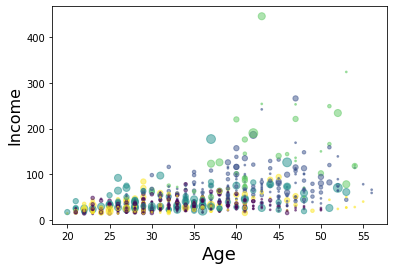

In [15]:
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

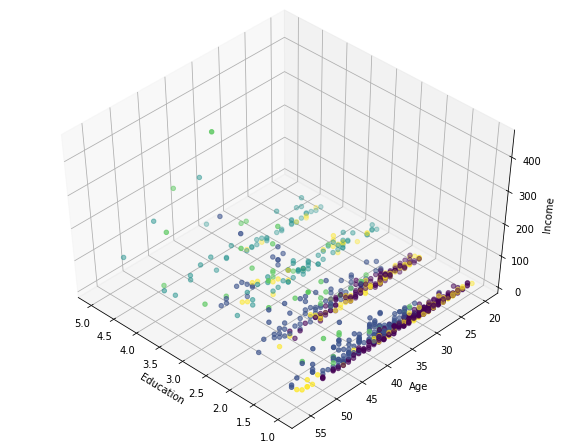

In [16]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))


#Analisis de resultados
- k-means dividirá a los clientes o datos en grupos mutuamente excluyentes, por ejemplo, en 5 grupos. Los clientes de cada grupo son similares demográficamente entre sí.
Podemos crear con esta informacion un perfil para cada grupo, considerando las características comunes de cada clúster.
Por ejemplo, perfiles del tipo

  - AFLUENTE, EDUCADO Y MAYOR
  - INGRESOS MEDIOS E INGRESOS
  - JOVEN Y BAJOS INGRESOS

- Podemos ver, que las caracteristicas de los datos juegan un rol muy importante para una buena clusterizacion

- Una mala eleccion del k podria ocasionar perder tiempo y recursos

- Algoritmos de redes neuronales podrian ayudar en el pre-procesamiento de los datos, extreyendo asi caracteristicas que ayuden a una mejor clusterizacion "Deep clustering"